# Algoritmos Genéticos con Python

## Entrenamiento de Red Neuronal

Cuando tenemos una red neuronal y realizamos el entrenamiento de la misma, el objetivo del entrenamiento es dar los valores adecuados a los **pesos** de la red. La forma de afinar estos valores es usando el **Backpropagation** mediante el **Optimizador** elegido.
Pdoemos plantear el cálculo de los **pesos** como un problema a resolver mediante un **Algoritmo Genético**. Vamos a tener que cada uno de los **individuos/cromosoma** tiene tantos **genes** como número de **parámetros(pesos)** de la rede neuronal. Estos parámetros serán valores **reales (como flotante)**.
En nuestro caso la **función fitness** será la que nos diga cómo de bien predice nuestra red neuronal con los pesos que le asignamos.
Veamos cómo se entrena una **Red Neuronal** con un **Algoritmo Genético**

Usaremos el **dataset** de **boston housing** que tiene los datos de un problema de regresión en el que a partir de 
ciertas características (número de habitaciones, metros cuadros, número de baños, etc) tenemos el **precio** de la vivienda en **miles de euros**. 
*Los precios son muy bajos porque son precios de los años 70's.*
                                                                                                                                             

In [1]:
# Importamos las librerías de keras/tensorflow
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Importamos la librería de los datasets de keras y cogemos el de boston_housing
from tensorflow.keras.datasets import boston_housing

# Dataset boston_housing
# Problema de regresión, cálculo del valor de un piso, años 70
# 404 datos de entrenamiento con 13 variables explicativas


# Obtenemos los datos de entrenamiento y test
# separados en las variables explicativas y la objetivo
# 13 variables con las característicias de los pisos (metros, habitaciones, baños, etc)
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

print( train_data[0:5])
print( train_targets[0:5])

# Realizamos la "Normalización" restando la media y dividiendo por la desviación típica
# Ahora tendremos valores (-x,x) alredor de 0, pero en general pequeños
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

(404, 13)
(102, 13)
[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]
[15.2 42.3 50.  21.1 17.7]


In [3]:
# Creamos el modelo

# Inicializamos el API Secuencial de capas
model = keras.Sequential([
        # Añadimos capa de entrada con las 13 variables explicativas
        keras.Input(shape=(13,)),
        # Añadimos capa densamente conectada con 64 neuronas y activación relu
        layers.Dense(16, activation="relu"),
        # Añadimos capa densamente conectada con 64 neuronas y activación relu
        layers.Dense(8, activation="relu"),
        # Añadimos capa de salida densamente conectada con 1 neurona y activación lineal (para regresión)
        layers.Dense(1)
    ])

# Mostramos el Modelo creado
model.summary()

# Compilamos el modelo definiendo el optimizador, función de pérdida y métrica
# RMSProp, mse, mae
model.compile(optimizer="adam", loss="mse", metrics=["mae"])



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Solo ejecutar para comparar con el modelo con Algoritmo Genético
#model.fit(train_data, train_targets, epochs=100, verbose=0)
print(model.evaluate(test_data,test_targets,verbose=0))
print(model.predict(test_data)[0:5])
print(test_targets[0:5])

[613.3562622070312, 23.023765563964844]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[ 0.5118017 ]
 [-0.05971977]
 [ 0.04419818]
 [ 0.1043075 ]
 [-0.03002968]]
[ 7.2 18.8 19.  27.  22.2]


Generacion = 1
Fitness    = 0.05592324204222756
Generacion = 2
Fitness    = 0.05905943857332634
Generacion = 3
Fitness    = 0.06167647866379522
Generacion = 4
Fitness    = 0.06500636869425705
Generacion = 5
Fitness    = 0.0684798681678118
Generacion = 6
Fitness    = 0.08053361995813658
Generacion = 7
Fitness    = 0.0892730667365847
Generacion = 8
Fitness    = 0.09902479208063535
Generacion = 9
Fitness    = 0.10936491062955368
Generacion = 10
Fitness    = 0.10936491062955368
Generacion = 11
Fitness    = 0.1245721223512245
Generacion = 12
Fitness    = 0.13110627592516857
Generacion = 13
Fitness    = 0.13768361882696317
Generacion = 14
Fitness    = 0.14819688114405113
Generacion = 15
Fitness    = 0.16658922959188524
Generacion = 16
Fitness    = 0.16658922959188524
Generacion = 17
Fitness    = 0.16658922959188524
Generacion = 18
Fitness    = 0.16658922959188524
Generacion = 19
Fitness    = 0.16658922959188524
Generacion = 20
Fitness    = 0.16861942511486672
Generacion = 21
Fitness    = 0.1

C:\Users\acca3\miniconda3\envs\mineriadatos2\Lib\site-packages\pygad\visualize\plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


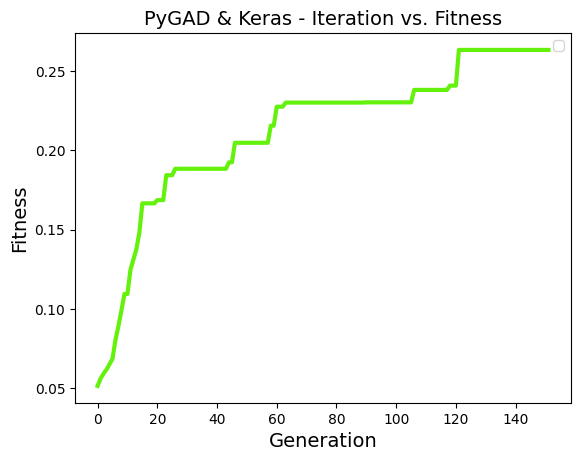

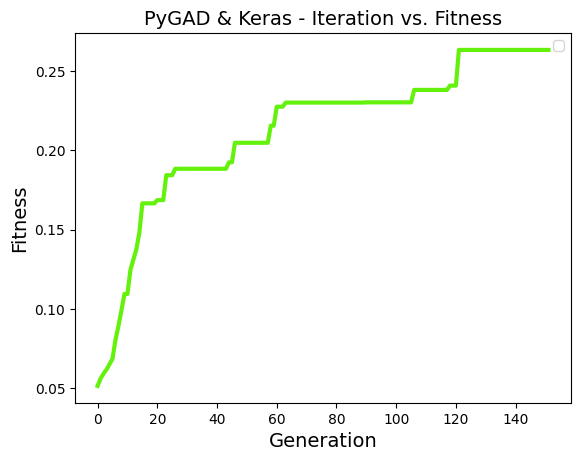

In [7]:
import pygad.kerasga
import numpy
import pygad


# Definimos la función fitness
# Para cada solución/individuo lo que hacemos es poner esos pesos
# en nuestra red neuronal y predicir con este modelo
# Así calculamos el Eror Medio Absoluto que lo usaremos para
# construir el valor devuelto por el resultado

def fitness_func(ga_instance, solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model
    #print(solution)
    # Asigna la solución a la red neuronal
    # Hace la predicción
    predictions = pygad.kerasga.predict(model=model,
                                        solution=solution,
                                        data=train_data)
    # Obtenemos el error medio absoluto
    mae = tensorflow.keras.losses.MeanAbsoluteError()
    #print(mae)
    # El valor de 0.00000001 es para evitar que el denominador sea 0
    abs_error = mae(train_targets, predictions).numpy() + 0.00000001 
    #print(abs_error)
    solution_fitness = 1.0/abs_error
    #print(solution_fitness)

    return solution_fitness

# En cada generación mostramos
# El número de generación actual
# Cual es el fitness actual de la mejor solución
def on_generation(ga_instance):
    print(f"Generacion = {ga_instance.generations_completed}")
    #print(f"Fitness Todos = {ga_instance.population.shape}") # Para ver tamñano de las soluciones
    print(f"Fitness    = {ga_instance.best_solution()[1]}")

# Este objeto se usa para interaccionar con la red neuronal
# Para predict, calcular error, calcular pesos inciales, etc
# Definimos cuantos individuos hay en la población
keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=15)



# Parámetros para el Algoritmo
num_generations = 250 # Numero de generaciones
num_parents_mating = 5 # Number de indiviudos a ser seleccionados como padres

# Se calcula una población inicial (los pesos de la red neuronal)
initial_population = keras_ga.population_weights # Initial population of network weights

# No afecta si se inicializa población, se usa el num_solution
# sol_per_pop = 50 # Número de individuos en la población


# Creamos la instancia del algoritmo genético
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       stop_criteria=["saturate_30"], # Ponemos un número grande para evitar caer en máximo locales
                       on_generation=on_generation)

# Ejecutmos la instancia
ga_instance.run()

# Pintamos la evolución del entreanmeinto generación/fitness
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness")


In [8]:
# Obtenemos los detalles de la Mejor Solución
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Fitness de la mejor solución = {solution_fitness}")

# Hacemos predicciones con el modelo obtenido
predictions = pygad.kerasga.predict(model=model,
                                    solution=solution,
                                    data=test_data)
#print(f"Predictions : \n{predictions}")

print("Predicciones con el modelo entrenado")
print( predictions[0:5] )
print( "Valores reales" )
print( test_targets[0:5])
mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(test_targets, predictions).numpy()
print(f"Error Medio Absoluto : {abs_error}")
print(f"Numero de genes = Número parámetros de la red neuronal : {solution.shape}")


Fitness de la mejor solución = 0.2634480341474122
Predicciones con el modelo entrenado
[[12.165703]
 [15.541832]
 [20.595764]
 [37.726376]
 [24.734877]]
Valores reales
[ 7.2 18.8 19.  27.  22.2]
Error Medio Absoluto : 4.457636833190918
Numero de genes = Número parámetros de la red neuronal : (369,)


In [ ]:
#---------------------------------------------------------------